## Bài 1:

Logistic Regression

In [1]:
from sklearn.datasets import load_iris # import the iris dataset
import numpy as np # import numpy
iris = load_iris() # load the iris dataset

In [2]:
x = iris["data"][:, 3:] # petal width
y = (iris["target"] == 2).astype(np.int) # 1 if Iris-Virginica, else 0

C:\Users\Phat Thanh\AppData\Local\Temp\ipykernel_5620\457993268.py:2: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  y = (iris["target"] == 2).astype(np.int) # 1 nếu Iris-Virginica, 0 nếu không phải


In [3]:
X_new = np.linspace(0, 3, 1000).reshape(-1, 1) # create a new array of 1000 values between 0 and 3

Gradient descent 

In [4]:
intercept = np.ones((x.shape[0], 1)) 
X = np.concatenate((intercept, x), axis=1) 


In [73]:
def sigmoid(z): # sigmoid function
    return 1 / (1 + np.exp(-z))
def compute_loss(y_true, y_hat): # compute the loss
    return -np.mean(y_true * np.log(y_hat) + (1 - y_true) * np.log(1 - y_hat))
def compute_gradient(X, y_true, y_hat): # compute the gradient
    return np.dot(X.T, (y_hat - y_true)) / len(y_true)
def initializers(X): # initialize the weights
    X_features = X.shape[1]
    W = np.zeros((X_features,))
    return W
def fit(X, y_true, iter=100, alpha=0.1): # fit function
    w = initializers(X)
    for i in range(iter):
        z = np.dot(X, w)
        y_hat = sigmoid(z)
        loss = compute_loss(y_true, y_hat)
        gradient = compute_gradient(X, y_true, y_hat)
        w = w - alpha * gradient
    return w
def predict(X_new, w): # predict the class
    X_new_intercept = np.concatenate((np.ones((X_new.shape[0], 1)), X_new), axis=1)
    y_hat_new = sigmoid(np.dot(X_new_intercept, w))   
    return y_hat_new


In [74]:
# fit the model
w=fit(X, y)

In [75]:
# find the theta values
y_hat_new = predict(X_new, w)
y_hat_new = np.where(y_hat_new >= 0.5, 1, 0)


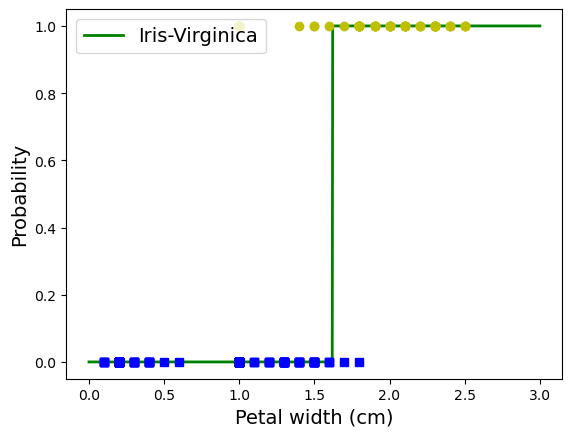

In [12]:
# plot the results
import matplotlib.pyplot as plt
plt.plot(X_new, y_hat_new, "g-", linewidth=2, label="Iris-Virginica")
plt.plot(X[y==0], y[y==0], "bs")
plt.plot(X[y==1], y[y==1], "yo")
plt.xlabel("Petal width (cm)", fontsize=14)
plt.ylabel("Probability", fontsize=14)
plt.legend(loc="upper left", fontsize=14)
plt.show()

## Bài 2:

In [77]:
# fit the model in first 100 rows
w1 = fit(X[1:100], y[1:100])

In [48]:
y[1:100]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [78]:
# predict the class
y_compare = predict(x, w1)
y_compare = np.where(y_compare >= 0.5, 1, 0)

In [79]:
y_compare[1:100]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [80]:
from sklearn.metrics import accuracy_score
accuracy_score(y[1:100], y_compare[1:100])

1.0

## Bài 3:

In [59]:
# fit the model
loss_list = [] # create an empty list to store the loss values
def fit_spec(X, y_true, iter=100, alpha=0.1): 
    w = initializers(X)
    for i in range(iter):
        z = np.dot(X, w)
        y_hat = sigmoid(z)
        loss = compute_loss(y_true, y_hat)
        loss_list.append(loss)
        gradient = compute_gradient(X, y_true, y_hat)
        w = w - alpha * gradient
    return w

<AxesSubplot:>

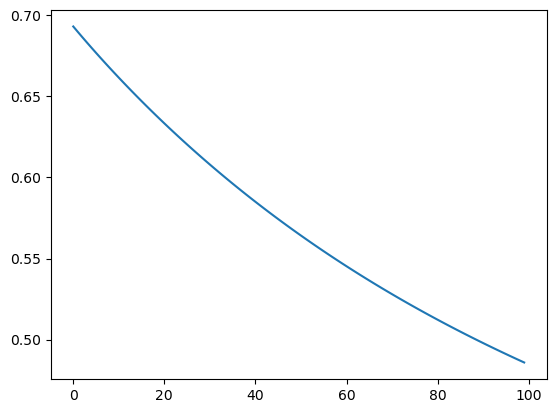

In [60]:
# fit the model and plot the loss
w= fit_spec(X, y, iter=100, alpha=0.1)
from seaborn import lineplot
lineplot(x=range(100), y=loss_list)

## Bài 4:

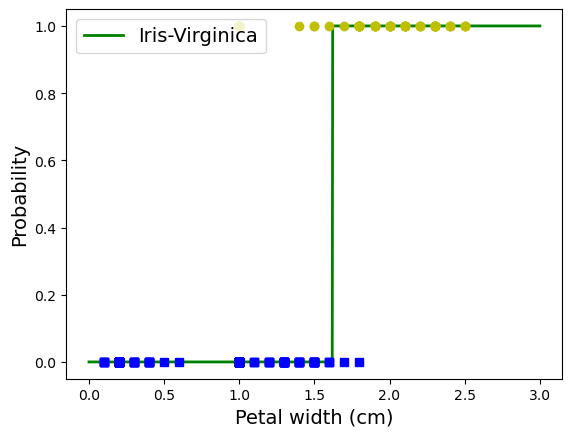

In [61]:
y_hat_new = predict(X_new, w) 
y_hat_new = np.where(y_hat_new >= 0.5, 1, 0)
plt.plot(X_new, y_hat_new, "g-", linewidth=2, label="Iris-Virginica")
plt.plot(X[y==0], y[y==0], "bs")
plt.plot(X[y==1], y[y==1], "yo")
plt.xlabel("Petal width (cm)", fontsize=14)
plt.ylabel("Probability", fontsize=14)
plt.legend(loc="upper left", fontsize=14)
plt.show()


## Bài 5:

So sánh bài 4:

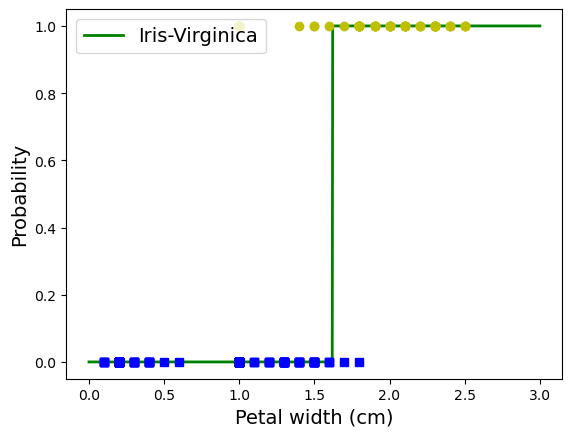

In [62]:
# not using sklearn
y_hat_new = predict(X_new, w)
y_hat_new = np.where(y_hat_new >= 0.5, 1, 0)
plt.plot(X_new, y_hat_new, "g-", linewidth=2, label="Iris-Virginica")
plt.plot(X[y==0], y[y==0], "bs")
plt.plot(X[y==1], y[y==1], "yo")
plt.xlabel("Petal width (cm)", fontsize=14)
plt.ylabel("Probability", fontsize=14)
plt.legend(loc="upper left", fontsize=14)
plt.show()


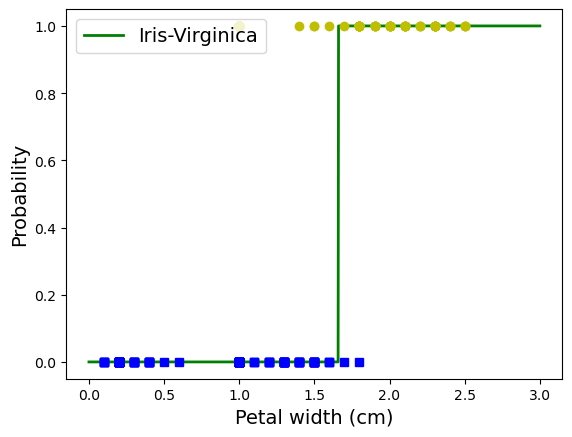

In [63]:
# using sklearn
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression() # create an instance of the class
log_reg.fit(x, y) # fit the model
y_proba = log_reg.predict_proba(X_new) # predict the probability
y_proba = np.where(y_proba >= 0.5, 1, 0) # classify the probability
plt.plot(X_new, y_proba[:, 1], "g-", linewidth=2, label="Iris-Virginica")
plt.plot(X[y==0], y[y==0], "bs")
plt.plot(X[y==1], y[y==1], "yo")
plt.xlabel("Petal width (cm)", fontsize=14)
plt.ylabel("Probability", fontsize=14)
plt.legend(loc="upper left", fontsize=14)
plt.show()

In [86]:
y_compare = predict(x, w)
y_compare = np.where(y_compare >= 0.5, 1, 0)
from sklearn.metrics import accuracy_score
accuracy_score(y[1:100], y_compare[1:100])


0.9797979797979798

In [85]:
y_compare_func= log_reg.predict(x)
accuracy_score(y[1:100], y_compare_func[1:100])

0.9797979797979798

## Bài 6:

In [88]:
#get iris petal length, sepel length, petal width, sepal width
x_all= iris.data[:, :4]
iris.feature_names
y_test = (iris.target == 2).astype(np.int)


C:\Users\Phat Thanh\AppData\Local\Temp\ipykernel_5620\4193599330.py:4: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  y_test = (iris.target == 2).astype(np.int)


In [89]:
X_all = np.concatenate((np.ones((x_all.shape[0], 1)), x_all), axis=1)

In [90]:
# predict with sklearn
log_reg_all = LogisticRegression()
log_reg_all.fit(x_all, y_test)
y_proba_all = log_reg_all.predict_proba(x_all)
y_pred_all = (y_proba_all[:, 1] > 0.5).astype(int)

In [91]:
accuracy = accuracy_score(y_test, y_pred_all)
print("Accuracy:", accuracy)

Accuracy: 0.9733333333333334


In [93]:
# predict with my model
w= fit_spec(X_all, y_test, iter=100, alpha=0.1)
y_compare_all = predict(x_all, w)
y_compare_all = np.where(y_compare_all >= 0.5, 1, 0)
accuracy = accuracy_score(y_test, y_compare_all)
print("Accuracy:", accuracy)

Accuracy: 0.9666666666666667
